# 项目：可视化帕默群岛企鹅数据

## 分析目标

此数据分析报告的目的是对帕默群岛上企鹅样本的相关变量进行可视化，从而探索和分析种类、性别、所在岛屿等因素，与企鹅的身体属性，包括体重、嘴峰长度和深度、鳍的长度，之间的关系。

## 简介

原始数据`Penguins.csv`包括334个收集自南极洲帕尔默群岛的3个岛屿上的企鹅样本，以及企鹅相关属性数据，包括种类名、所在岛、嘴峰长度、嘴峰深度、鳍长度、体重、性别。

`Penguins.csv`每列的含义如下：
- species：企鹅的种类
- island：企鹅所在岛
- culmen_length_mm：企鹅嘴峰的长度（单位为毫米）
- culmen_depth_mm：企鹅嘴峰的深度（单位为毫米）
- flipper_length_mm：企鹅鳍的长度（单位为毫米）
- body_mass_g：企鹅体重（单位为克）
- sex：企鹅性别

## 1、读取数据

In [11]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [12]:
original_data = pd.read_csv("penguins.csv")
original_data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


## 2、评估和清理数据

主要从两个方面进行：结构和内容，即整齐度和干净度。

数据的结构性问题指不符合“每个变量为一列，每个观察值为一行，每种类型的观察单位为一个表格”这三个标准；数据的内容性问题包括存在:
* 丢失数据
* 重复数据
* 不一致数据
* 无效/错误数据

In [23]:
cleaned_data = original_data.copy()

### 2.1 评估数据

#### 2.1.1 数据结构--整齐度

In [14]:
cleaned_data.sample(10)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
80,Adelie,Torgersen,34.6,17.2,189.0,3200.0,FEMALE
288,Gentoo,Biscoe,43.5,14.2,220.0,4700.0,FEMALE
299,Gentoo,Biscoe,45.2,16.4,223.0,5950.0,MALE
110,Adelie,Biscoe,38.1,16.5,198.0,3825.0,FEMALE
297,Gentoo,Biscoe,51.1,16.3,220.0,6000.0,MALE
94,Adelie,Dream,36.2,17.3,187.0,3300.0,FEMALE
153,Chinstrap,Dream,50.0,19.5,196.0,3900.0,MALE
329,Gentoo,Biscoe,48.1,15.1,209.0,5500.0,MALE
181,Chinstrap,Dream,52.8,20.0,205.0,4550.0,MALE
190,Chinstrap,Dream,46.9,16.6,192.0,2700.0,FEMALE


随机抽样的10行数据符合“每个变量为一列，每个观察值为一行，每种类型的观察单位为一个表格”，因此不存在结构性问题。

#### 2.1.2 数据内容--干净度

In [15]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


`culmen_length_mm`、`culmen_depth_mm`、`flipper_length_mm`、`body_mass_g`变量存在缺失值，将在后续进行评估和清理。
数据类型方面，我们已知`species`（企鹅种类）`sex`（企鹅性别）、`island`（企鹅所在岛）都是分类数据，因此可以把数据类型都转换为Category。

In [24]:
cleaned_data['species'] = cleaned_data['species'].astype("category")
cleaned_data['island'] = cleaned_data['island'].astype("category")
cleaned_data['sex'] = cleaned_data['sex'].astype("category")

In [25]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            344 non-null    category
 1   island             344 non-null    category
 2   culmen_length_mm   342 non-null    float64 
 3   culmen_depth_mm    342 non-null    float64 
 4   flipper_length_mm  342 non-null    float64 
 5   body_mass_g        342 non-null    float64 
 6   sex                334 non-null    category
dtypes: category(3), float64(4)
memory usage: 12.3 KB


### 2.2 清理数据

#### 2.2.1 处理缺失数据

`culmen_length_mm`、`culmen_depth_mm`、`flipper_length_mm`、`body_mass_g`变量存在缺失值，且均缺失2个

In [18]:
cleaned_data.query("culmen_length_mm.isna()")

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


可以看到索引为3和339的观察值，除了种类和所属岛屿外所有变量都为空，无法为探索企鹅身体属性相关因素提供价值，因此可以把这两行直接删除。

In [26]:
cleaned_data.drop(3,inplace=True)
cleaned_data.drop(339,inplace=True)
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 342 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            342 non-null    category
 1   island             342 non-null    category
 2   culmen_length_mm   342 non-null    float64 
 3   culmen_depth_mm    342 non-null    float64 
 4   flipper_length_mm  342 non-null    float64 
 5   body_mass_g        342 non-null    float64 
 6   sex                334 non-null    category
dtypes: category(3), float64(4)
memory usage: 14.7 KB


`sex`变量存在10个缺失值

In [27]:
cleaned_data.query("sex.isna()")

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN


缺失性别变量的观察值具备其它数据，仍然可以为分析提供价值，予以保留。

#### 2.2.2 处理重复数据

根据数据变量的含义以及内容来看，允许变量重复，我们不需要对此数据检查是否存在重复值。

#### 2.2.3处理不一致数据

不一致数据可能存在于所有分类变量中，我们要查看是否存在不同值实际指代同一目标的情况：
* species
* island
* sex

In [28]:
cleaned_data['species'].value_counts()

species
Adelie       151
Gentoo       123
Chinstrap     68
Name: count, dtype: int64

In [29]:
cleaned_data['island'].value_counts()

island
Biscoe       167
Dream        124
Torgersen     51
Name: count, dtype: int64

In [30]:
cleaned_data['sex'].value_counts()

sex
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64

从以上输出来看，`species`和`island`列里并不存在不一致数据，但`sex`列里存在一个英文句号值，并不代表任何有效性别，我们应当把该值替换为`NaN`空值。

In [31]:
cleaned_data['sex'] = cleaned_data['sex'].replace(".",np.nan)

/tmp/ipykernel_22016/1091057294.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  cleaned_data['sex'] = cleaned_data['sex'].replace(".",np.nan)


In [32]:
#检查是否替换成功
cleaned_data['sex'].value_counts()

sex
MALE      168
FEMALE    165
Name: count, dtype: int64

#### 2.2.4 处理无效/错误数据

In [33]:
cleaned_data.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


从以上统计信息来看，`cleaned_house_price`里不存在脱离现实意义的数值。

In [35]:
cleaned_data.to_csv("cleaned_penguins.csv",index=False)

## 3、探索数据|数据可视化分析

0、在最开始设置全局的色盘

In [34]:
sns.set_palette("pastel")

### 3.1 企鹅三个分类变量各自的比例：
* species：企鹅的种类
* island：企鹅所在岛
* sex：企鹅性别

1、种类比例

In [41]:
species_count = cleaned_data["species"].value_counts()
species_count

species
Adelie       151
Gentoo       123
Chinstrap     68
Name: count, dtype: int64

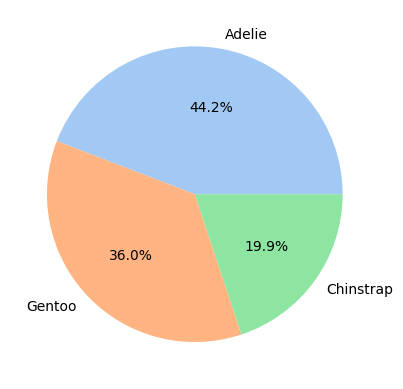

In [43]:
# plt.pie(species_count,autopct="%.1f%%",labels=['Adelie','Gentoo','Chinstrap'])
plt.pie(species_count,autopct="%.1f%%",labels=species_count.index)
plt.show()

样本中`Adelie`这个种类的企鹅占比最大，`Gentoo`种类的占比次之，`Chinstrap`的占比最小，为1/5左右。

2、岛屿比例

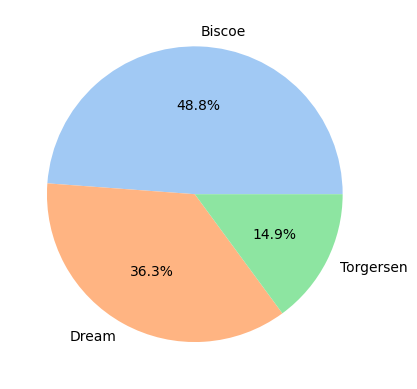

In [44]:
island_count = cleaned_data["island"].value_counts()
island_count
plt.pie(island_count,autopct="%.1f%%",labels=island_count.index)
plt.show()

样本中一半左右的企鹅样本都来自`Biscoe`岛屿，占比最大，其次是`Dream`岛屿，来自`Torgersen`岛屿的样本最少。

3、性别比例

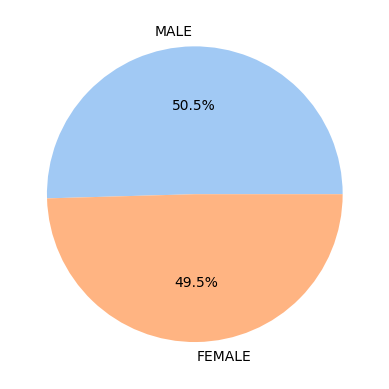

In [45]:
sex_count = cleaned_data["sex"].value_counts()
sex_count
plt.pie(sex_count,autopct="%.1f%%",labels=sex_count.index)
plt.show()

样本企鹅的性别占比持平，符合对随机抽样的预期。

### 3.2 各岛屿上不同企鹅的种类数量

2个分类变量+1个数值变量

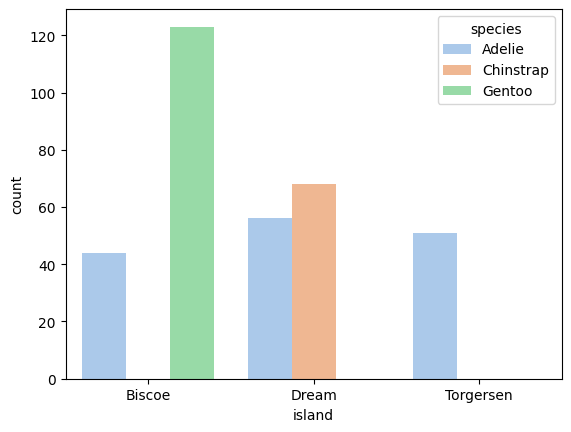

In [47]:
sns.countplot(data = cleaned_data,x="island",hue="species")
plt.show()

从以上可以看出，`Adelie`种类的企鹅样本在`Biscoe`、`Dream`、`Torgersen`这三个岛上都有，而`Chinstrap`种类只在`Dream`岛上才有，`Gentoo`只在`Biscoe`岛上才有。

### 3.3 各岛屿上企鹅的性别分布

2个分类（岛屿、性别）+1个数值（企鹅数量）

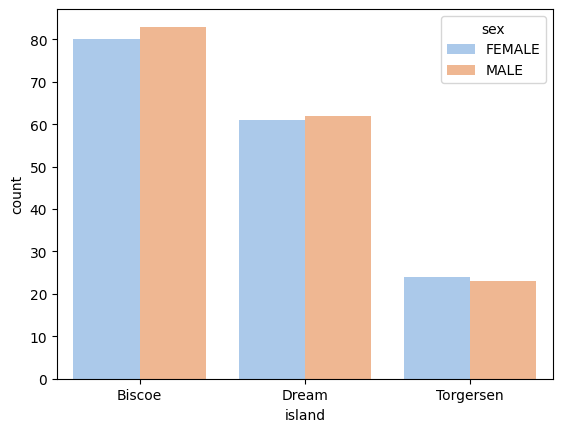

In [48]:
sns.countplot(data = cleaned_data,x="island",hue="sex")
plt.show()

### 3.4 分析各数值变量之间的关系

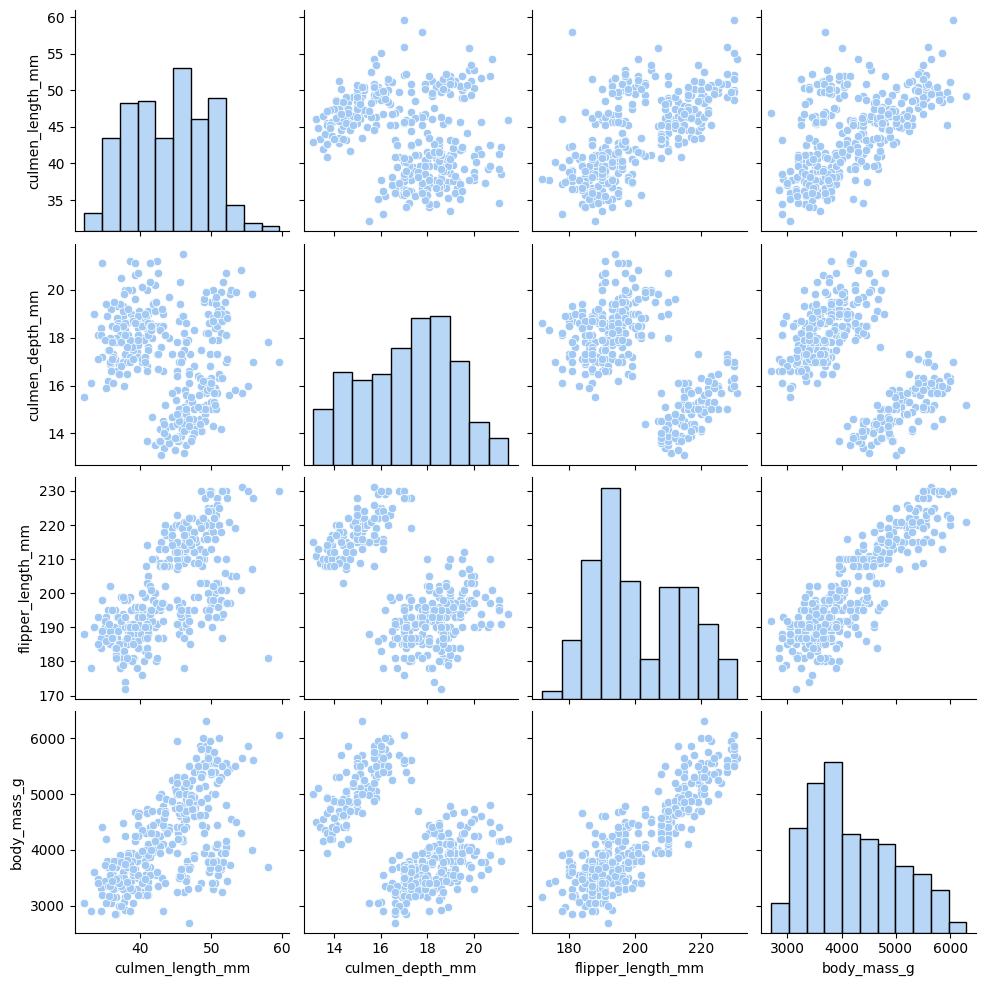

In [49]:
sns.pairplot(cleaned_data)
plt.show()

PS：联想双峰分布形成的可能原因：两组数据都是正态分布，但是它们的平均值中位数等存在显著差异，放到一起分析可能会形成双峰分布

从直方图来看，企鹅样本的嘴峰长度、嘴峰深度、鳍长度、体重的分布不是正态分布。一方面说明，这里面可能包含了多组存在差异的样本数据，另一方面也说明样本数不够大。

另外可以在散点图中看出明显的多个集群(clusters)，可能与某些因素有关，比如企鹅种类、性别，因此可以进行进一步的分组分析

#### 3.4.1 根据企鹅种类查看各数值变量的关系

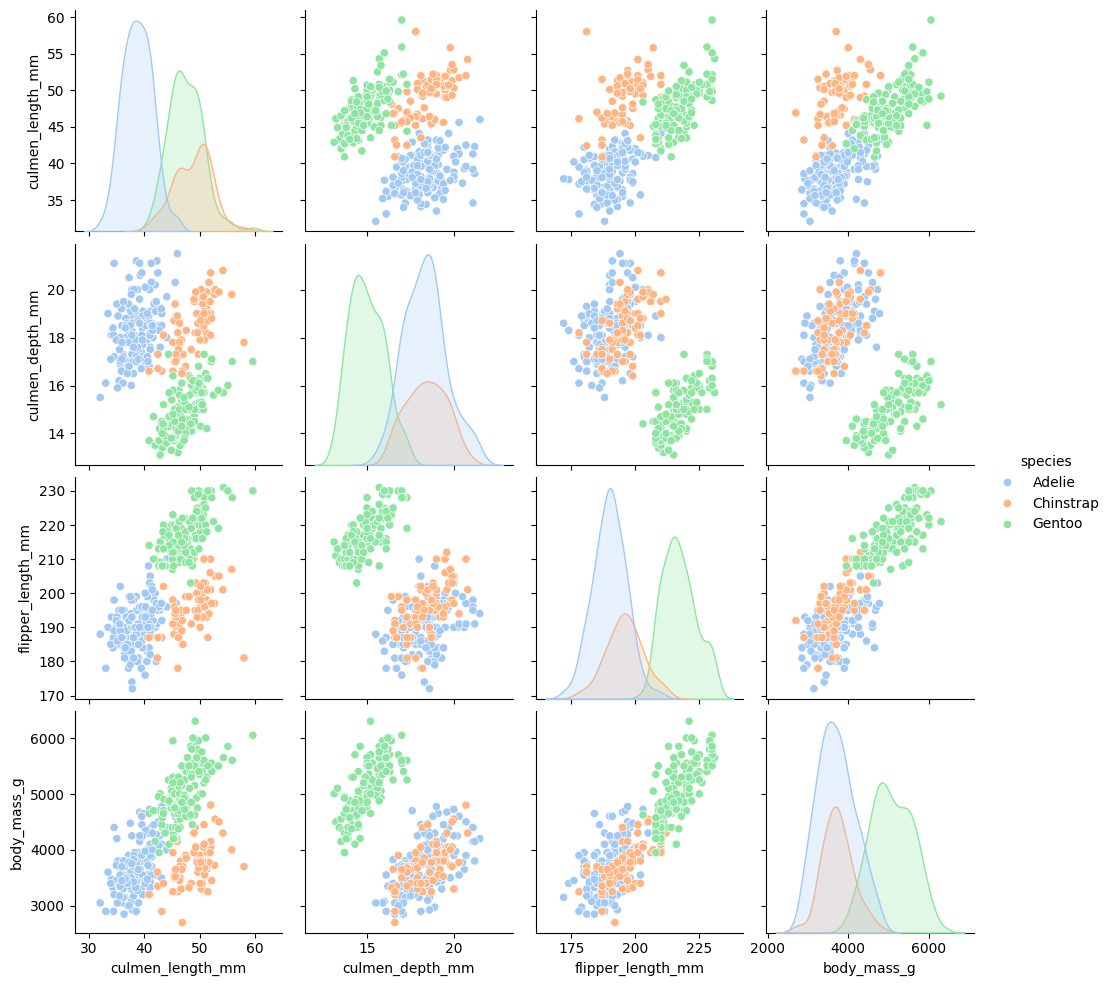

In [50]:
sns.pairplot(cleaned_data,hue="species")
plt.show()

同一种类的企鹅样本数据，在散点图上基本都聚在一起，说明同一种类的企鹅在嘴峰长度、嘴峰深度、鳍长度、体重之间关系上，存在相似性。这些发现有利于我们根据体重、鳍长等数值推测企鹅种类，也可以根据企鹅种类推测体重、鳍长等数值。

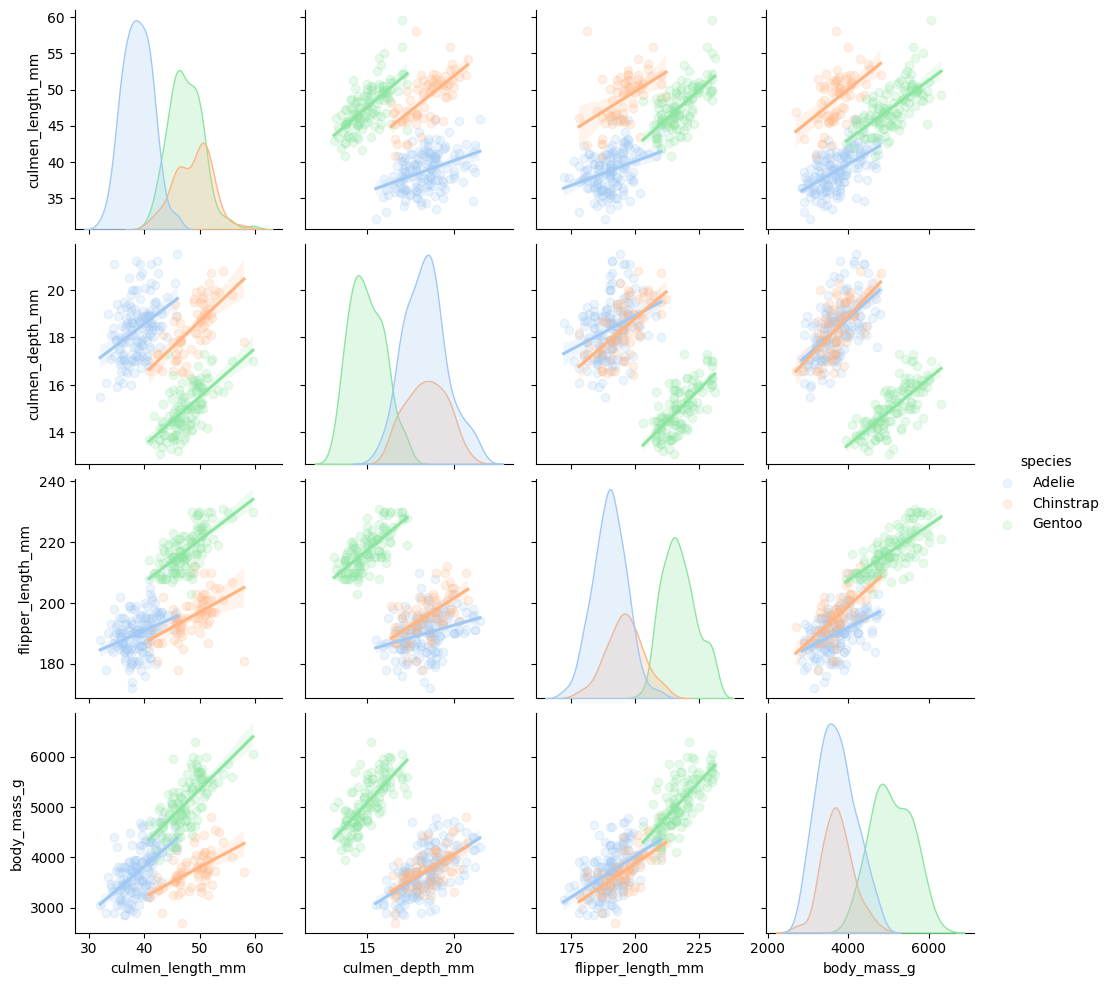

In [53]:
#reg = regression line回归线
#plot_kws修改图表中参数的表示
#alpha:透明度；1=不透明
sns.pairplot(cleaned_data,hue="species",kind="reg",plot_kws={"scatter_kws":{'alpha':0.2}})
plt.show()

散点图结合线性回归线来看，同类企鹅的属性数据之间均呈线性正比，即嘴峰越长，嘴峰越深，鳍越长，体重越重，嘴峰越短，嘴峰越浅，鳍越短，体重越轻。

从密度图（y轴代表概率密度）的分布来看，可以得到以下关于样本的发现：
- Chinstrap和Gentoo的嘴峰长度范围较为接近，而Adelie的嘴峰长度更短。
- Adelie和Chinstrap的嘴峰深度范围较为接近，而Gentoo的嘴峰深度更短。
- Adelie的鳍长度最短，Chinstrap中等，而Gentoo的鳍长度嘴长。
- Adelie和Chinstrap的体重范围较为接近，而Gentoo的体重更大。

PS：但不同种类的属性数值否存在统计显著性差异，仍然需要进行假设检验后才能得到结论。

#### 3.4.2 根据企鹅性别查看各数值变量的关系

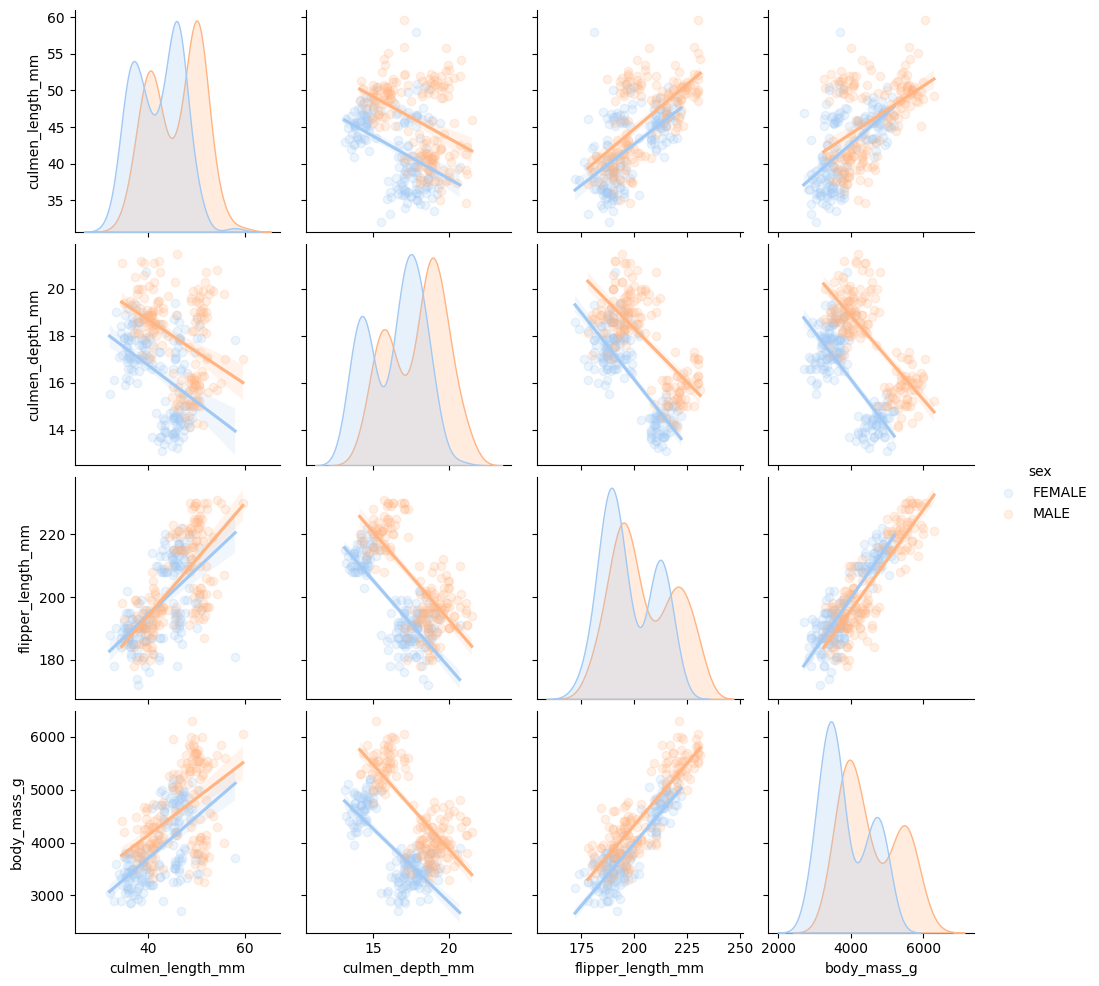

In [54]:
sns.pairplot(cleaned_data,hue="sex",kind="reg",plot_kws={"scatter_kws":{'alpha':0.2}})
plt.show()

根据性别划分后可以看出，样本中雄性企鹅在各项属性数值方面大于雌性企鹅。